Import requirements we need

In [2]:
import pandas as pd
import os
import re
from pprint import pprint #pretty print
import matplotlib.pyplot as plt

Load up data

In [3]:
df=pd.read_csv("./data/csv/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
339,0,1,male,45.0,0,0,35.500,S,First,man,True,NaN,Southampton,no,True
236,0,2,male,44.0,1,0,26.000,S,Second,man,True,NaN,Southampton,no,False
498,0,1,female,25.0,1,2,151.550,S,First,woman,False,C,Southampton,no,False
400,1,3,male,39.0,0,0,7.925,S,Third,man,True,NaN,Southampton,yes,True
83,0,1,male,28.0,0,0,47.100,S,First,man,True,NaN,Southampton,no,True


In [5]:
pprint(df.columns) #outline columns
pprint(df.dtypes) #get data types

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


Basic statistics 

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
pprint(df["embarked"].value_counts())
pprint(df["alive"].value_counts())
pprint(df["survived"].value_counts())
pprint(df["pclass"].value_counts())
pprint(df["sex"].value_counts())
pprint(df["embark_town"].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64
no     549
yes    342
Name: alive, dtype: int64
0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


Lets do some cleaning
Cleaning data reduces the dataset

In [8]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
df[df.pclass==1][df.alive=="yes"]

C:\Users\Muge\.virtualenvs\webinar#1-mAh4LxXU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [11]:
[df["age"]>50]

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 886    False
 887    False
 888    False
 889    False
 890    False
 Name: age, Length: 891, dtype: bool]

In [12]:
[df["survived"]==True]

[0      False
 1       True
 2       True
 3       True
 4      False
        ...  
 886    False
 887     True
 888    False
 889     True
 890    False
 Name: survived, Length: 891, dtype: bool]

In [17]:
df[(df["age"]>50) & (df["survived"]==True)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
268,1,1,female,58.0,0,1,153.4625,S,First,woman,False,C,Southampton,yes,False
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
366,1,1,female,60.0,1,0,75.2500,C,First,woman,False,D,Cherbourg,yes,False
449,1,1,male,52.0,0,0,30.5000,S,First,man,True,C,Southampton,yes,True
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True
496,1,1,female,54.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
513,1,1,female,54.0,1,0,59.4000,C,First,woman,False,NaN,Cherbourg,yes,False


Some basic graphs

([<matplotlib.patches.Wedge at 0x26103065c18>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

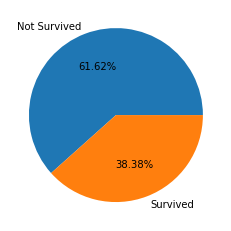

In [105]:
%matplotlib inline
plt.pie(df.survived.value_counts(),labels=["Not Survived","Survived"],autopct='%1.2f%%')

<AxesSubplot:>

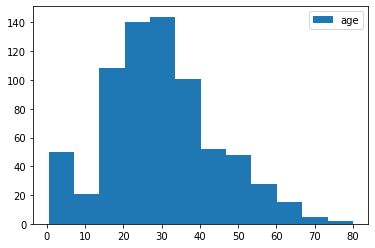

In [103]:
df.age.hist(bins=12,grid=False,legend=True)